In [3]:
pip install keras


     ---------------------------------------- 1.7/1.7 MB 3.8 MB/s eta 0:00:00


In [6]:
pip install tensorflow


     ---------------------------------------- 455.9/455.9 MB ? eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.3 MB/s eta 0:00:00
     --------------------------------------- 42.6/42.6 kB 71.4 kB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 kB 891.1 kB/s eta 0:00:00
     ------------------------------------ 123.4/123.4 kB 808.0 kB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 2.7 MB/s eta 0:00:00
     ------------------------------------ 438.7/438.7 kB 830.3 kB/s eta 0:00:00
     -------------------------------------- 57.5/57.5 kB 302.8 kB/s eta 0:00:00
     -------------------------------------- 896.1/896.1 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 2.3 MB/s eta 0:00:00
     -------------------------------------- 781.3/781.3 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 93.3/9

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')


In [4]:
train_df=pd.read_csv('C:/Users/vinay/Downloads/archives/mitbih_train.csv',header=None)
test_df=pd.read_csv('C:/Users/vinay/Downloads/archives/mitbih_test.csv',header=None)

In [35]:
train_df.head()
train_df.shape

(100000, 188)

In [12]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)


0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


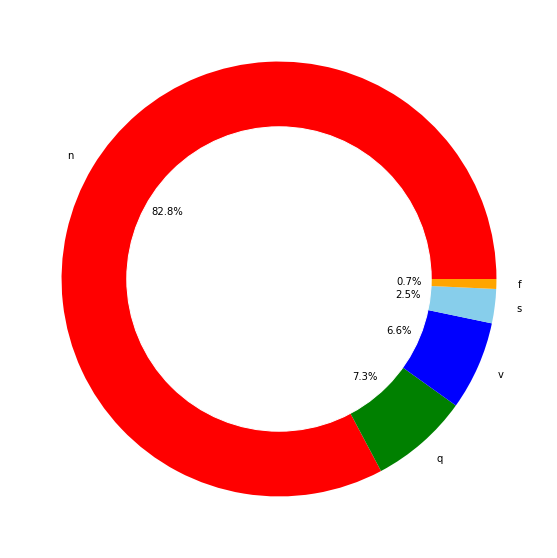

In [14]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [36]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])
train_df.shape

(100000, 188)

In [24]:
equilibre=train_df[187].value_counts()
print(equilibre)


0    20000
1    20000
2    20000
3    20000
4    20000
Name: 187, dtype: int64


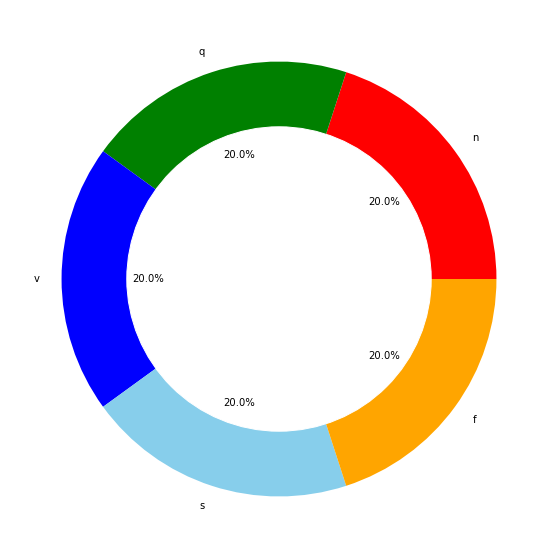

In [25]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [6]:
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))
c


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
37739,1.000000,0.834382,0.182390,0.033543,0.138365,0.104822,0.109015,0.085954,0.083857,0.067086,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
74583,0.545817,0.501992,0.374502,0.270916,0.231076,0.175299,0.151394,0.139442,0.131474,0.103586,...,0.326693,0.573705,0.800797,1.0,0.689243,0.223108,0.0,0.039841,0.063745,1.0
75175,0.546584,0.493789,0.326087,0.015528,0.000000,0.052795,0.080745,0.083851,0.105590,0.077640,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,2.0
81106,1.000000,0.919540,0.534483,0.310345,0.193487,0.160920,0.141762,0.126437,0.118774,0.105364,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,3.0
83899,1.000000,0.919842,0.829172,0.764783,0.662286,0.561104,0.440210,0.350854,0.239159,0.190539,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,4.0


In [9]:
c.iloc[0,:186]

0      1.000000
1      0.834382
2      0.182390
3      0.033543
4      0.138365
         ...   
181    0.000000
182    0.000000
183    0.000000
184    0.000000
185    0.000000
Name: 37739, Length: 186, dtype: float64

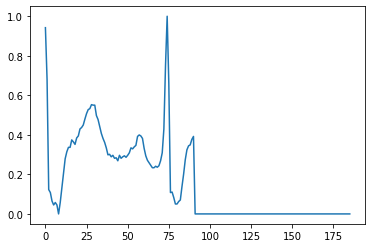

In [29]:
 plt.plot(c.iloc[0,:186])
 

In [30]:
def plot_hist(class_number,size,min_,bins):
    img=train_df.loc[train_df[187]==class_number].values
    img=img[:,min_:size]
    img_flatten=img.flatten()

    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(bins,bins),cmap=plt.cm.jet)
    plt.show()

1300000
1300000


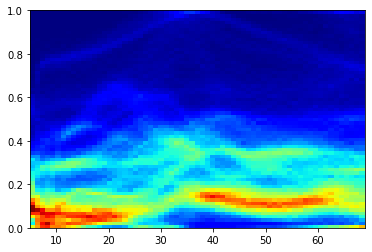

In [31]:
plot_hist(0,70,5,65)

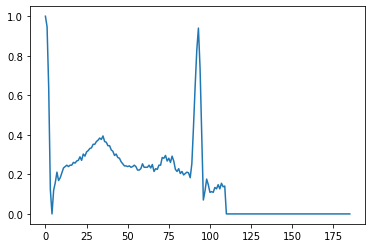

In [42]:
 plt.plot(c.iloc[1,:186])

900000
900000


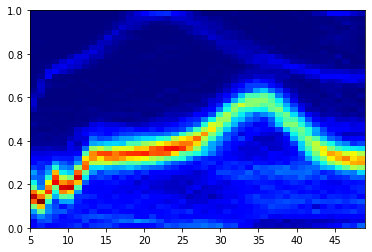

In [44]:
plot_hist(1,50,5,45)

900000
900000


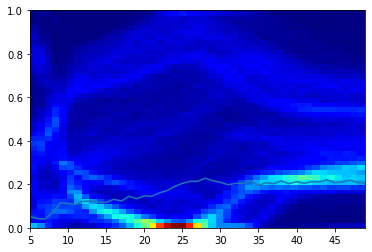

In [45]:
 plt.plot(c.iloc[2,:186])
 plot_hist(2,50,5,45)

In [46]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.5,186)
    return (signal+noise)

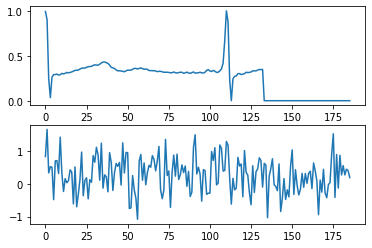

In [50]:
tempo=c.iloc[0,:186]
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()



In [51]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [52]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
for i in range(len(X_train)):
    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [53]:
def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
#     callbacks = [EarlyStopping(monitor='val_loss', patience=8),
#              ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=40,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [60]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(X_train,y_train,X_test,y_test)



Epoch 1/40
3125/3125 [==============================] - 103s 31ms/step - loss: 0.9115 - accuracy: 0.6503 - val_loss: 1.0271 - val_accuracy: 0.6128
Epoch 2/40
3125/3125 [==============================] - 89s 28ms/step - loss: 0.8022 - accuracy: 0.6949 - val_loss: 0.9989 - val_accuracy: 0.5941
Epoch 3/40
3125/3125 [==============================] - 85s 27ms/step - loss: 0.7685 - accuracy: 0.7095 - val_loss: 0.9494 - val_accuracy: 0.6229
Epoch 4/40
3125/3125 [==============================] - 83s 27ms/step - loss: 0.7410 - accuracy: 0.7190 - val_loss: 1.2937 - val_accuracy: 0.4028
Epoch 5/40
3125/3125 [==============================] - 93s 30ms/step - loss: 0.7164 - accuracy: 0.7289 - val_loss: 0.9509 - val_accuracy: 0.5952
Epoch 6/40
3125/3125 [==============================] - 95s 31ms/step - loss: 0.6919 - accuracy: 0.7394 - val_loss: 1.0033 - val_accuracy: 0.6004
Epoch 7/40
3125/3125 [==============================] - 94s 30ms/step - loss: 0.6657 - accuracy: 0.7488 - val_loss: 0.9077 

In [1]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)
    

Accuracy: 64.99%


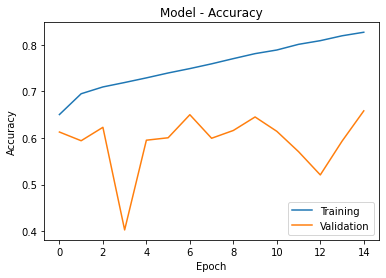

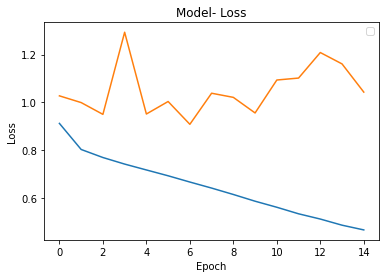

685/685 [==============================] - 4s 6ms/step


In [64]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

Normalized confusion matrix


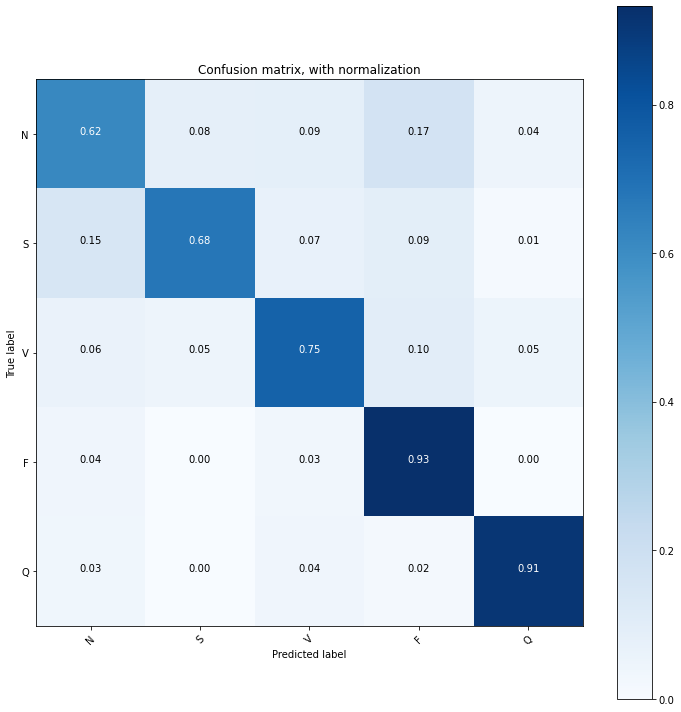

In [65]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()

# S---> Supraventricular premature beat
# V--->Premature ventricular contraction
# F--->Fusion of ventricular and normal beat
# Q--->Unclassifiable beat